<a href="https://colab.research.google.com/github/vitormm44/materia-dl/blob/master/Tarefa_1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importações de pacotes e dados

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dados = pd.read_csv('drive/My Drive/Colab Google/Tarefa DL 1/Pima-Diabetes.csv', header=None)
dados_tarefa = pd.read_csv('drive/My Drive/Colab Google/Tarefa DL 1/Test-Group-2.csv', header=None)

Breve exploração dos dados

In [3]:
dados.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       758 non-null    int64  
 1   1       758 non-null    int64  
 2   2       758 non-null    int64  
 3   3       758 non-null    int64  
 4   4       758 non-null    int64  
 5   5       758 non-null    float64
 6   6       758 non-null    float64
 7   7       758 non-null    int64  
 8   8       758 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.4 KB


In [5]:
dados.columns = ['Col0','Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8']
dados.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Separando as labels do conjunto de dados
labels = dados['Col8']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Col8, dtype: int64

In [7]:
dados = dados.drop('Col8', axis=1)

dados.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
print(dados.shape)
print(labels.shape)

(758, 8)
(758,)


Separando os dados de treino dos de teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    dados,
    labels,
    test_size=0.799)

print(X_train.shape)
print(X_test.shape)

(152, 8)
(606, 8)


In [10]:
y_test.value_counts()

0    401
1    205
Name: Col8, dtype: int64

In [11]:
y_train.value_counts()

0    92
1    60
Name: Col8, dtype: int64

Criação, compilação e análise dos resultados do modelo

In [41]:
model = Sequential([
  Dense(1000, activation='sigmoid', input_shape=(8,)),
  Dropout(0.3),
  Dense(500, activation='sigmoid'),
  Dropout(0.3),
  Dense(1, activation='sigmoid'),
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

historico = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=605,
    validation_data=(X_test, y_test)
)

Epoch 1/20
1/1 [==============================] - 0s 153ms/step - loss: 0.8352 - accuracy: 0.4079 - val_loss: 1.0090 - val_accuracy: 0.6617
Epoch 2/20
1/1 [==============================] - 0s 33ms/step - loss: 1.1272 - accuracy: 0.6053 - val_loss: 0.8259 - val_accuracy: 0.6617
Epoch 3/20
1/1 [==============================] - 0s 31ms/step - loss: 0.9157 - accuracy: 0.6053 - val_loss: 0.6367 - val_accuracy: 0.6617
Epoch 4/20
1/1 [==============================] - 0s 31ms/step - loss: 0.7095 - accuracy: 0.5395 - val_loss: 0.8580 - val_accuracy: 0.3383
Epoch 5/20
1/1 [==============================] - 0s 31ms/step - loss: 0.8356 - accuracy: 0.4079 - val_loss: 0.8867 - val_accuracy: 0.3399
Epoch 6/20
1/1 [==============================] - 0s 31ms/step - loss: 0.8113 - accuracy: 0.4539 - val_loss: 0.7074 - val_accuracy: 0.5248
Epoch 7/20
1/1 [==============================] - 0s 32ms/step - loss: 0.6783 - accuracy: 0.5921 - val_loss: 0.6268 - val_accuracy: 0.6535
Epoch 8/20
1/1 [==========

In [42]:
historico.history

{'accuracy': [0.40789473056793213,
  0.6052631735801697,
  0.6052631735801697,
  0.5394737124443054,
  0.40789473056793213,
  0.45394736528396606,
  0.5921052694320679,
  0.6184210777282715,
  0.6052631735801697,
  0.5986841917037964,
  0.5986841917037964,
  0.6184210777282715,
  0.625,
  0.6907894611358643,
  0.6578947305679321,
  0.5921052694320679,
  0.6315789222717285,
  0.6710526347160339,
  0.6776315569877625,
  0.6644737124443054],
 'loss': [0.8351719379425049,
  1.1272052526474,
  0.9157403707504272,
  0.7094593644142151,
  0.8356115221977234,
  0.8112660646438599,
  0.6783064603805542,
  0.6686949729919434,
  0.7595703601837158,
  0.7761645317077637,
  0.6947294473648071,
  0.6206962466239929,
  0.6277098059654236,
  0.6156497001647949,
  0.6350187063217163,
  0.6517766118049622,
  0.6190735697746277,
  0.6081290245056152,
  0.6044163107872009,
  0.6147821545600891],
 'val_accuracy': [0.6617161631584167,
  0.6617161631584167,
  0.6617161631584167,
  0.33828383684158325,
  0.33

Text(0.5, 1.0, 'Acurácia dos dados de treino e validação')

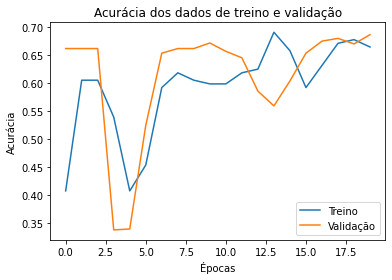

In [43]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia dos dados de treino e validação')

Text(0.5, 1.0, 'Perda dos dados de treino e validação')

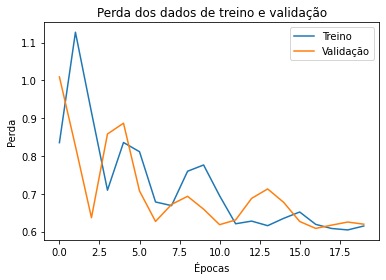

In [44]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda dos dados de treino e validação')